enter the starting coordinate x0: 2
enter the starting coordinate y0: 3
enter the ending coordinate x1: 50
enter the ending coordinate y1: 60
enter the scaling coordinate x: 2
enter the scaling coordinate y: 3
the line has steep slope(m>1)


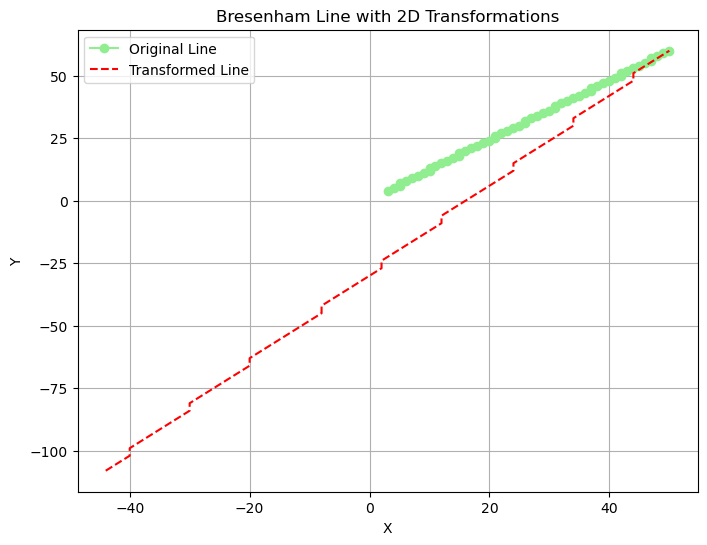

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x0= int(input("enter the starting coordinate x0: "))
y0= int(input("enter the starting coordinate y0: "))
x1= int(input("enter the ending coordinate x1: "))
y1= int(input("enter the ending coordinate y1: "))
sx= int(input("enter the scaling coordinate x: "))
sy= int(input("enter the scaling coordinate y: "))

def BLA(x0,y0,x1,y1):
    dx= abs(x1-x0)
    dy= abs(y1-y0)

    if (x1>x0):
        sx = 1
    else:
        sx = -1
    if ( y1 > y0 ):
        sy = 1
    else:
        sy = -1

    if ( dx >= dy ):
        print('the line has shallow slope(m<=1)')
        po = 2*dy - dx 

    elif ( dx < dy ):
        print('the line has steep slope(m>1)')
        po = 2*dx - dy
    pointsx=[]
    pointsy=[]

    for i in range(max(dx,dy)):   
        if ( dx >= dy ):
            x0 = x0 + sx
            if ( po >= 0 ):
                y0 = y0 + sy
                po = po + 2*dy - 2*dx
            else:
                po = po + 2*dy
            pointsx.append(x0)
            pointsy.append(y0)

        else:
            y0 = y0 + sy
            if ( po >= 0 ):
                x0 = x0 + sx
                po = po + 2*dx - 2*dy
            else:
                po = po + 2*dx
            pointsx.append(x0)
            pointsy.append(y0)
    return pointsx,pointsy

pointsx,pointsy= BLA(x0,y0,x1,y1)
T1 = np.array([[1,0,x1], [0,1,y1], [0,0,1]])
S = np.array([[sx,0,0], [0,sy,0], [0,0,1]])
T2 = np.array([[1,0,-x1], [0,1,-y1], [0,0,1]])

CM = T1 @ S @ T2
points = np.vstack((pointsx,pointsy,np.ones_like(pointsx)))
TM = CM @ points 
plt.figure(figsize=(8, 6))
plt.plot(pointsx,pointsy,marker='o',color='lightgreen', linestyle='-', label='Original Line')
plt.plot(TM[0],TM[1], color='red', linestyle='--', label='Transformed Line')

plt.title("Bresenham Line with 2D Transformations")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()